# Performance of R
### Exemplary Problem: Numerical solution of logistic differential equation 
$\frac{\partial U(t)}{\partial t} = U(t)(1-U(t))$ 
 
Strategy: 
Transform into discrete sequence and calculate the single steps for sufficient small time steps $\Delta t$.

$U(t+\Delta t) =U(t)+ U(t)(1-U(t))\Delta t $

First step: Install and import neccesary packages

In [15]:
install.packages("devtools")
devtools::install_github("eddelbuettel/rbenchmark")
library(rbenchmark)



  There is a binary version available but the source version is later:
         binary source needs_compilation
devtools  2.4.1  2.4.2             FALSE



installing the source package 'devtools'


Please download and install Rtools 3.5 from https://cran.r-project.org/bin/windows/Rtools/.
Skipping install of 'rbenchmark' from a github remote, the SHA1 (a2039510) has not changed since last install.
  Use `force = TRUE` to force installation


Second step: Define function for discretisation with number of steps N as input argument

In [16]:
R_logistic <- function(N){
    # Parameters
    T = 25
    u0 = 1e-5
    # Right hand side function
    f = function(u) {u*(1-u)}
    # Discretization
    t = seq(0, T, length.out=N)
    dt = t[2]-t[1]
    # Time stepping
    u = vector(mode="numeric", length=N)
    u[1] = u0
    for (k in 1:(N-1)){
        u[k+1] = u[k] + dt*f(u[k])
    }
    return(list(t,u))
}

Third step: Visualize the problem, so see if everthing works as planned  

In [17]:
result = R_logistic(1000)

In [18]:
length(result[[2]])

[1] 1000

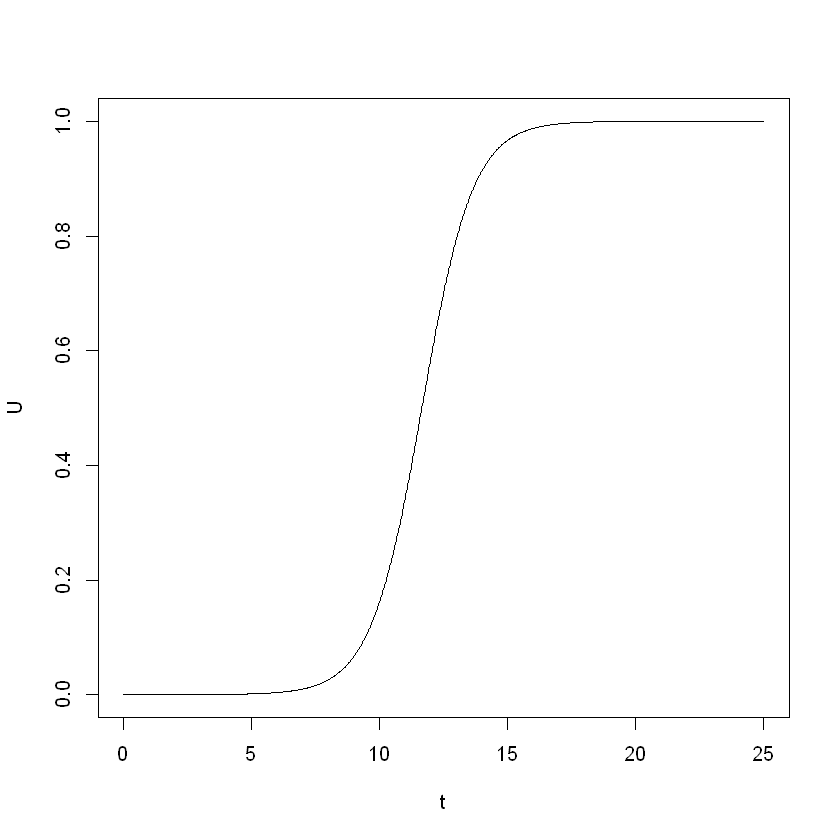

In [19]:
plot(result[[1]],result[[2]],'l',xlab="t",ylab="U")

Fourth step: Benchmark the function 

In [20]:
result = benchmark(logistic={x<-R_logistic(1000)},replications=10000)

In [21]:
#result in µs
result["elapsed"]/10000*1000*1000

elapsed
478


Fifth step: Realize that R is also slow but not as fucking slow as python